In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
#import plotly.plotly as py
#py.set_credentials_file(username='raoshaheryarkhan', api_key='KswnKD2cSzUMp6zxf25p')
#import plotly.figure_factory as ff
import math
from datetime import datetime
import sys
import os

In [2]:
project_path = "PycharmProjects/Amazon-Mining"
# make sure to use position 1
sys.path.insert(1, project_path)
os.chdir("/Users\RSK\PycharmProjects\Amazon-Mining")
from src.data.json_loader import JSONLoader
os.chdir("/Users\RSK")
file_path = 'Documents\DataMining/reviews_Electronics_5.json.gz'
loader = JSONLoader()

In [3]:
sales_Brand = pd.read_json('PycharmProjects\Amazon-Mining\dataset\SalesRank_Popularity.json', orient='columns')
sales_Reviews = pd.read_json('PycharmProjects\Amazon-Mining\dataset\SalesRank_Reviews.json', orient='columns')

In [4]:
sales_BrandGroup = sales_Brand[['salesCat','rank']].groupby(['salesCat'],as_index=False).count()

In [5]:
sales_BrandGroup = sales_BrandGroup.nlargest(5, 'rank')
topFiveCat = {}
topFiveCat_R = {}

In [6]:
count = 0 
for cat in sales_BrandGroup.salesCat:
    topFiveCat[count] = sales_Brand[sales_Brand['salesCat'] == cat]
    topFiveCat_R[count] = sales_Reviews[sales_Reviews['salesCat'] == cat]
    count += 1

    

In [7]:
electronicsPop=topFiveCat[0][['brand','popularity','rank']].groupby(['brand','popularity'],as_index=False).min()
topElectronics = electronicsPop[electronicsPop['rank'] < 100].nsmallest(50,'rank').reset_index()
del topElectronics['index']

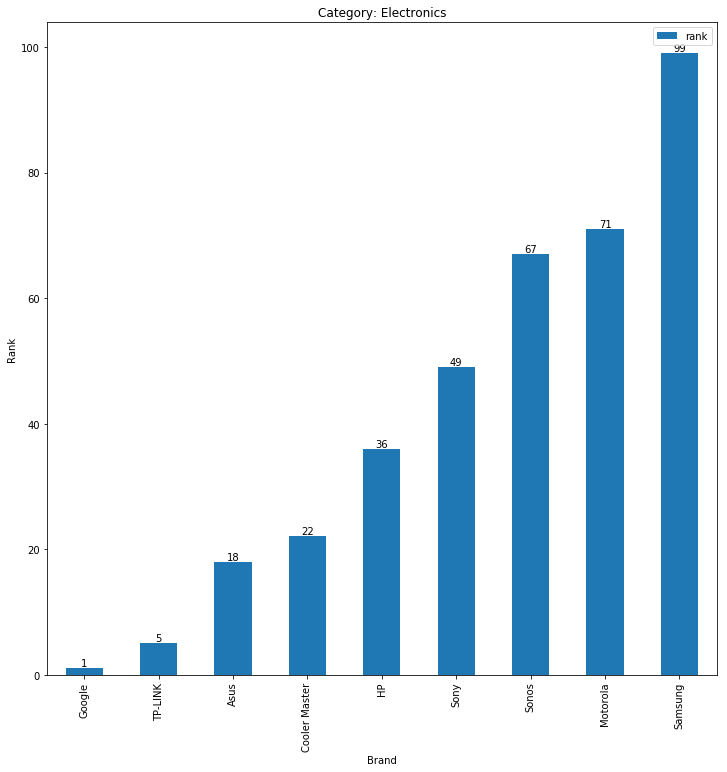

In [82]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
electronicsPlot = topElectronics.plot( x="brand", y="rank", kind="bar")
electronicsPlot.set_title("Category: Electronics")
electronicsPlot.set_xlabel("Brand")
electronicsPlot.set_ylabel("Rank")
rects = electronicsPlot.patches
labels = [i for i in topElectronics.loc[:,'rank']]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    electronicsPlot.text(rect.get_x() + rect.get_width()/2, height     , label, ha='center', va='bottom')
plt.savefig('PycharmProjects/Amazon-Mining/reports/Sales Data/brandElectronicsRanks.png')

In [9]:
cameraPop=topFiveCat[1][['brand','popularity','rank']].groupby(['brand','popularity'],as_index=False).min()
topCamera = cameraPop[cameraPop['rank'] < 50].nsmallest(50,'rank').reset_index()
del topCamera['index']

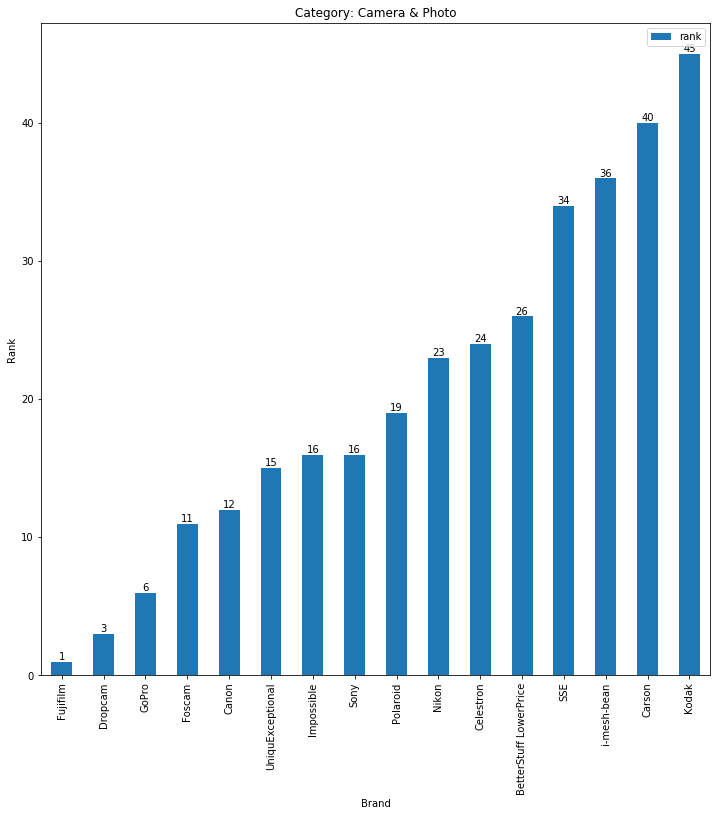

In [80]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12 
plt.rcParams["figure.figsize"] = fig_size
cameraPlot = topCamera.plot( x="brand", y="rank", kind="bar")
cameraPlot.set_title("Category: Camera & Photo")
cameraPlot.set_xlabel("Brand")
cameraPlot.set_ylabel("Rank")
rects = cameraPlot.patches
labels = [i for i in topCamera.loc[:,'rank']]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    cameraPlot.text(rect.get_x() + rect.get_width()/2, height  , label, ha='center', va='bottom')
plt.savefig('PycharmProjects/Amazon-Mining/reports/Sales Data/brandCamerasRanks.png' )

In [11]:
cellPhonesPop=topFiveCat[2][['brand','popularity','rank']].groupby(['brand','popularity'],as_index=False).min()
topCellPhones = cellPhonesPop[cellPhonesPop['rank'] < 250].nsmallest(50,'rank').reset_index()
del topCellPhones['index']

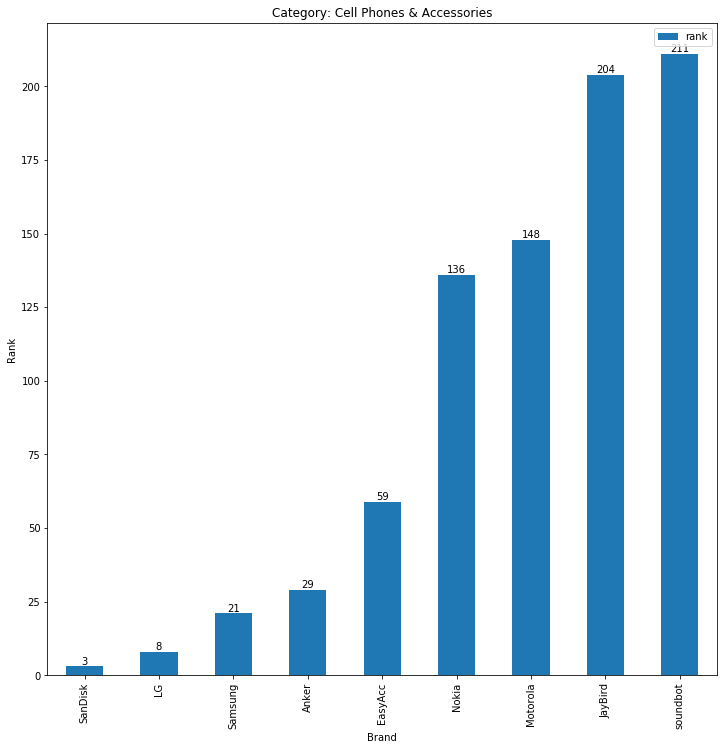

In [79]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
cellPhonePlot = topCellPhones.plot( x="brand", y="rank", kind="bar")
cellPhonePlot.set_title("Category: Cell Phones & Accessories")
cellPhonePlot.set_xlabel("Brand")
cellPhonePlot.set_ylabel("Rank")
rects = cellPhonePlot.patches
labels = [i for i in topCellPhones.loc[:,'rank']]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    cellPhonePlot.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')
plt.savefig('PycharmProjects/Amazon-Mining/reports/Sales Data/brandCellPhonesRanks.png')

In [13]:
computersPop = topFiveCat[3][['brand','popularity','rank']].groupby(['brand','popularity'],as_index=False).min()
topComputer = computersPop[computersPop['rank'] < 227].nsmallest(50,'rank').reset_index()
del topComputer['index']

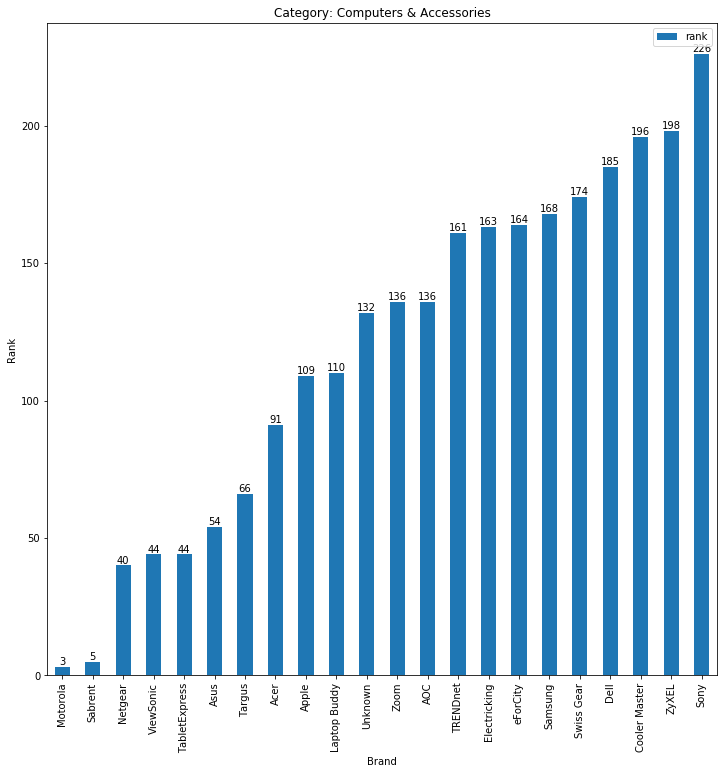

In [78]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
computerPlot = topComputer.plot( x="brand", y="rank", kind="bar")
computerPlot.set_title("Category: Computers & Accessories")
computerPlot.set_xlabel("Brand")
computerPlot.set_ylabel("Rank")
rects = computerPlot.patches
labels = [i for i in topComputer.loc[:,'rank']]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    computerPlot.text(rect.get_x() + rect.get_width()/2, height , label, ha='center', va='bottom')
plt.savefig('PycharmProjects/Amazon-Mining/reports/Sales Data/brandComputerRanks.png')

In [83]:
musicalPop=topFiveCat[4][['brand','popularity','rank']].groupby(['brand','popularity'],as_index=False).min()
topMusical = musicalPop[musicalPop['rank'] < 250].nsmallest(20,'rank').reset_index()
del topMusical['index']
topMusical=topMusical[topMusical['rank'] != 59]

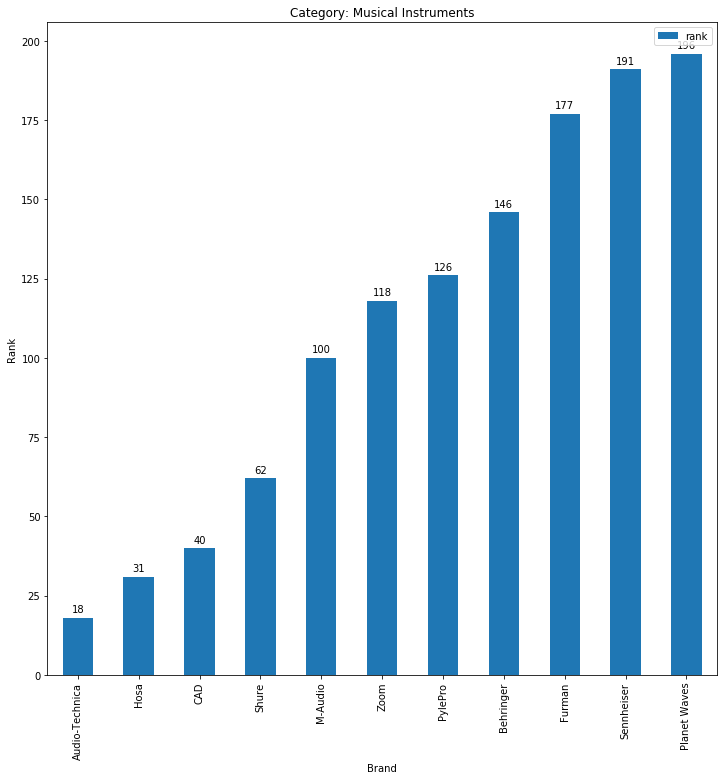

In [84]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
musicalPlot = topMusical.plot( x="brand", y="rank", kind="bar")
musicalPlot.set_title("Category: Musical Instruments")
musicalPlot.set_xlabel("Brand")
musicalPlot.set_ylabel("Rank")
rects = musicalPlot.patches
labels = [i for i in topMusical.loc[:,'rank']]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    musicalPlot.text(rect.get_x() + rect.get_width()/2, height + 1, label, ha='center', va='bottom')
plt.savefig('PycharmProjects/Amazon-Mining/reports/Sales Data/brandMusicalRanks.png')

#### With Reviews Analysis

In [17]:
electronicsPrice = topFiveCat_R[0][['rank','price']].copy()
bins = [0,2,4, 9, 19, 49, 99, 199, 499, 999, 9999]
group_names = ['0+','3+','5+', '10+' ,'20+', '50+', '100+','200+','500+','1000+']
electronicsPrice['priceRange'] = pd.cut(electronicsPrice['price'], bins, labels=group_names)
electronicsPrice = electronicsPrice.reset_index()
del electronicsPrice['index']
electronicsPrice = electronicsPrice[['priceRange','rank']].groupby(['priceRange'],as_index=False).min()

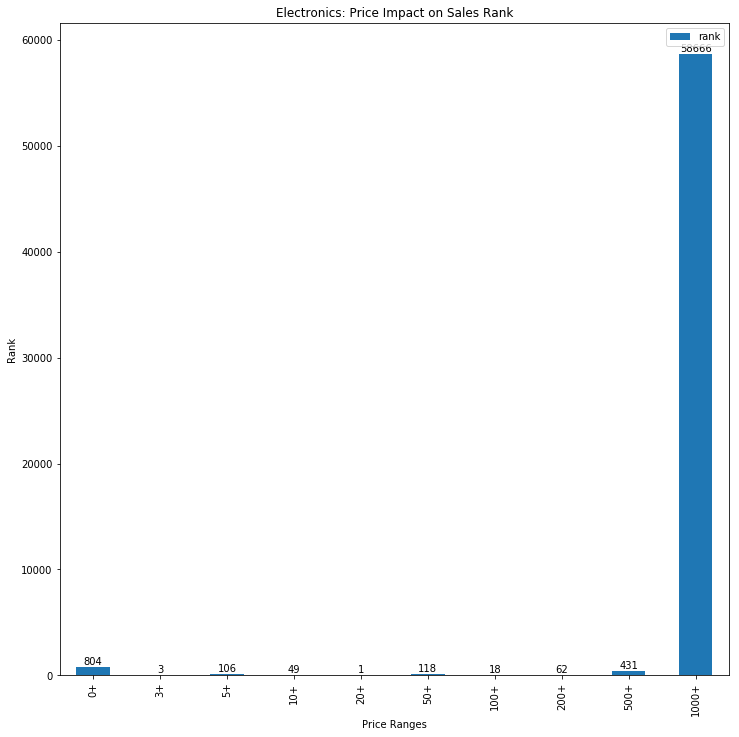

In [76]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
pricePlot = electronicsPrice.plot( x="priceRange", y="rank", kind="bar")
pricePlot.set_title("Electronics: Price Impact on Sales Rank")
pricePlot.set_xlabel("Price Ranges")
pricePlot.set_ylabel("Rank")
rects = pricePlot.patches
labels = [i for i in electronicsPrice.loc[:,'rank']]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    pricePlot.text(rect.get_x() + rect.get_width()/2, height +2, label, ha='center', va='bottom')
plt.savefig('PycharmProjects/Amazon-Mining/reports/Sales Data/SalesRank Review/price_rank.png')


In [19]:
cameraReview = topFiveCat_R[1][['rank','reviewCount']].copy()
bins = [4, 9, 19, 49, 99, 199, 499, 999, 9999]
group_names = ['5+', '10+' ,'20+', '50+', '100+','200+','500+','1000+']
cameraReview['reviewRange'] = pd.cut(cameraReview['reviewCount'], bins, labels=group_names)
cameraReview = cameraReview.reset_index()
del cameraReview['index']
cameraReview = cameraReview[['reviewRange','rank']].groupby(['reviewRange'],as_index=False).mean()
cameraReview['rank']=cameraReview['rank'].round(1)

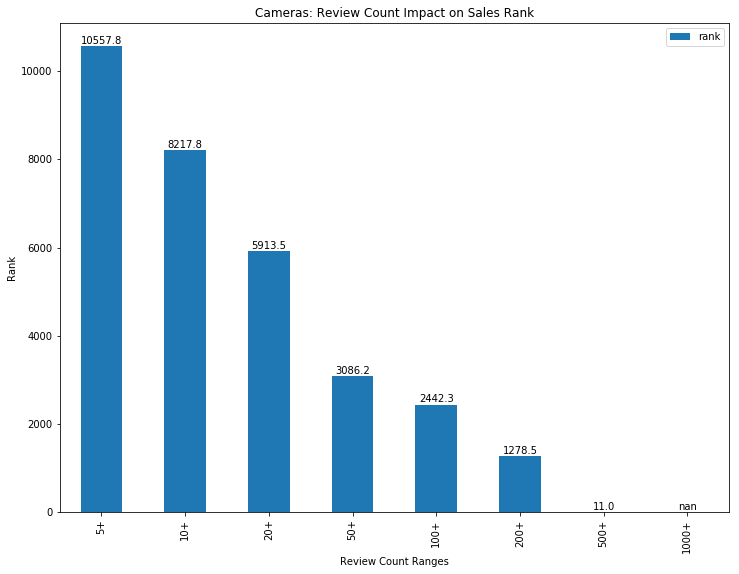

In [20]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
cameraRPlot = cameraReview.plot( x="reviewRange", y="rank", kind="bar")
cameraRPlot.set_title("Cameras: Review Count Impact on Sales Rank")
cameraRPlot.set_xlabel("Review Count Ranges")
cameraRPlot.set_ylabel("Rank")
rects = cameraRPlot.patches
labels = [i for i in cameraReview.loc[:,'rank']]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    cameraRPlot.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.savefig('PycharmProjects/Amazon-Mining/reports/Sales Data/SalesRank Review/reviewCount_rank.png')


In [21]:
cameraRatings = topFiveCat_R[1][['rank','overall']].copy()
bins = [1, 1.999, 2.499, 2.999, 3.499, 3.999, 4.499,5.0]
group_names = ['1+','2+','2.5+','3+','3.5+','4+','4.5+']
cameraRatings['overallRange'] = pd.cut(cameraRatings['overall'], bins, labels=group_names)
cameraRatings = cameraRatings.reset_index()
del cameraRatings['index']
cameraRatings = cameraRatings[['overallRange','rank']].groupby(['overallRange'],as_index=False).min()
cameraRatings['rank']=cameraRatings['rank'].round(1)

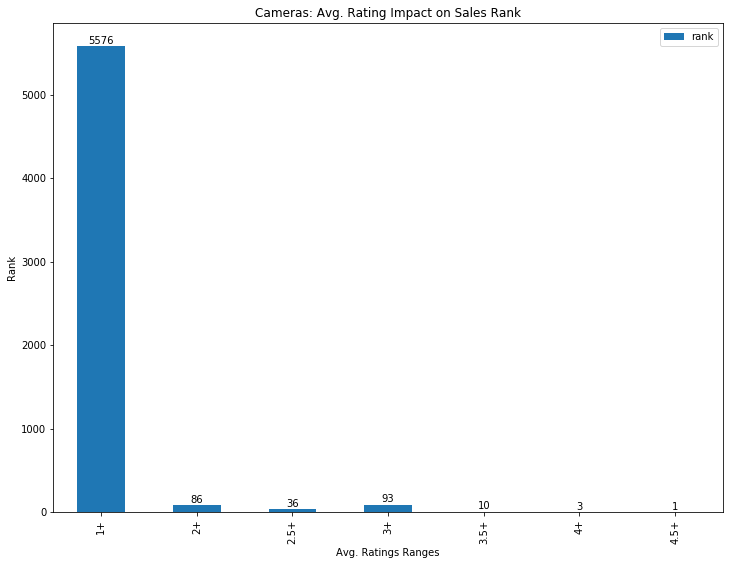

In [22]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
cameraRatPlot = cameraRatings.plot( x="overallRange", y="rank", kind="bar")
cameraRatPlot.set_title("Cameras: Avg. Rating Impact on Sales Rank")
cameraRatPlot.set_xlabel("Avg. Ratings Ranges")
cameraRatPlot.set_ylabel("Rank")
rects = cameraRatPlot.patches
labels = [i for i in cameraRatings.loc[:,'rank']]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    cameraRatPlot.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.savefig('PycharmProjects/Amazon-Mining/reports/Sales Data/SalesRank Review/avgRating_rank.png')


In [23]:
cameraHelpful= topFiveCat_R[2][['rank','helpfulVotes']].copy()
bins = [4, 9, 19, 49, 99, 199, 499, 999, 4999,9999,49999]
group_names = ['5+', '10+' ,'20+', '50+', '100+','200+','500+','1000+','5000+','10,000+']
cameraHelpful['helpfulRange'] = pd.cut(cameraHelpful['helpfulVotes'], bins, labels=group_names)
cameraHelpful = cameraHelpful.reset_index()
del cameraHelpful['index']
cameraHelpful = cameraHelpful[['helpfulRange','rank']].groupby(['helpfulRange'],as_index=False).mean()
cameraHelpful['rank']=cameraHelpful['rank'].round(1)
cameraHelpful

,helpfulRange,rank
0,5+,107822.4
1,10+,87273.6
2,20+,62454.6
3,50+,44826.9
4,100+,27157.6
5,200+,26609.0
6,500+,9229.8
7,1000+,1855.1
8,5000+,3.0
9,"10,000+",NaN


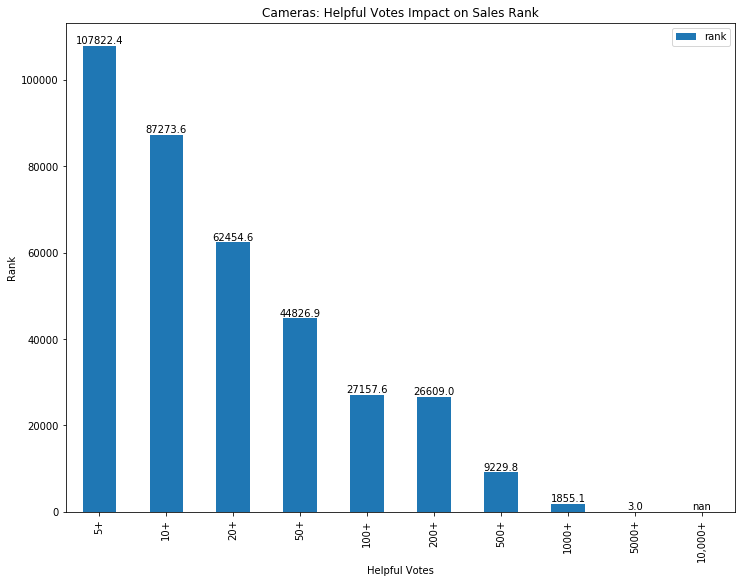

In [24]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
cameraHelpPlot = cameraHelpful.plot( x="helpfulRange", y="rank", kind="bar")
cameraHelpPlot.set_title("Cameras: Helpful Votes Impact on Sales Rank")
cameraHelpPlot.set_xlabel("Helpful Votes")
cameraHelpPlot.set_ylabel("Rank")
rects = cameraHelpPlot.patches
labels = [i for i in cameraHelpful.loc[:,'rank']]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    cameraHelpPlot.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.savefig('PycharmProjects/Amazon-Mining/reports/Sales Data/SalesRank Review/helpful_rank.png')